In [1]:
using DelimitedFiles
using Plots
using DataFrames
using DataFramesMeta
using LaTeXStrings
using Statistics
using Jammy

In [2]:
# read SAMMY calcs in
totlst = readdlm(joinpath(pwd(),"../data/ta181tot.lst"),Float64);
caplst = readdlm(joinpath(pwd(),"../data/ta181cap.lst"),Float64);
elalst = readdlm(joinpath(pwd(),"../data/ta181ela.lst"),Float64);

In [3]:
#### User input #############################
egrid::Vector{Float64} = totlst[:,1]#[0.01:0.0001:12.0;]
respars = DataFrame(
    Jpi = [4.0,   3.0],
    Elam= [4.2801, 10.34],
    Gg  = [0.0530,0.0550],
    Gn  = [0.0039,0.00466],
)
# respars = DataFrame(
#     Jpi = [4.0],
#     Elam= [4.2801],
#     Gg  = [0.0530],
#     Gn  = [0.0039],
# )
targetspin = 3.5
targetmass = 180.94803
projmass = 1 # neutron 
projspin = 0.5
ac = 8.1271  # fermi = 1e-15 m
#############################################

sigt,sign,sigx,sigc = Jammy.calcxs(egrid,respars,targetspin,targetmass,projspin,projmass,ac);

Number of resonances:     2
Number of part. channels: 1
Number of spin groups:    2


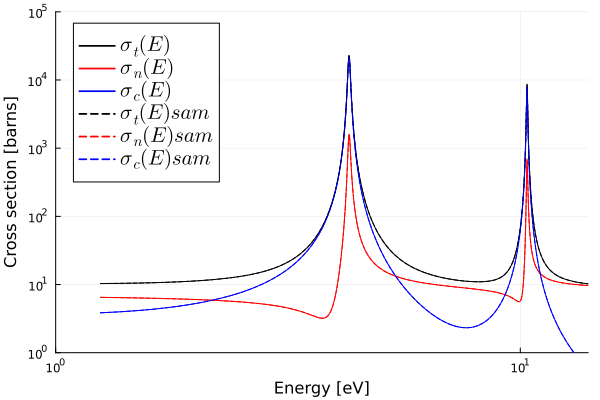

In [4]:
plot(egrid,[sigt,sign,sigc,totlst[:,4],elalst[:,4],caplst[:,4]],
color=["black" "red" "blue" "black" "red" "blue"],
linestyle=[:solid :solid :solid :dash :dash :dash],
label=[L"\sigma_t(E)" L"\sigma_n(E)" L"\sigma_c(E)" L"\sigma_t(E) sam" L"\sigma_n(E) sam" L"\sigma_c(E) sam"],
yaxis=:log,xaxis=:log,xlims=(1e0,1.4e1),ylims=(1e0,1.0e5),legendfont=font(14),legend=:topleft,
xlabel="Energy [eV]",ylabel="Cross section [barns]")


In [30]:
for iE = 1:size(egrid,1)
    fracdifftot = (totlst[iE,4]-sigt[iE])/totlst[iE,4]
    fracdiffcap = (caplst[iE,4]-sigc[iE])/caplst[iE,4]
    fracdiffela = (elalst[iE,4]-sign[iE])/elalst[iE,4]
    err = 0.0001
    if((fracdiffela > err))
        println(egrid[iE]," ",fracdiffela)
    end
end

3.8150091245 0.00012072809849215142
3.8246257138 0.00014611208397709093
3.8342790211 0.0001736495398005702
3.8439686292 0.0002034236489735558
3.8536951641 0.00023550492556861151
3.8634586256 0.0002699423392339057
3.8732592225 0.00030676205972821367
3.8830973719 0.00034596417824092786
3.8929728653 0.0003875165655646349
3.9028861199 0.0004313578433898599
3.9128371357 0.00047739248729963607
3.92282633 0.0005254954861289987
3.9328539113 0.0005755124150833556
3.9429200884 0.0006272651202879789
3.9530246525 0.0006805565046863915
3.9631684382 0.0007351871068253879
3.9733510283 0.0007909536742059949
3.9835730485 0.0008476732767098948
3.9938347076 0.0009051884395353525
4.0041357969 0.0009633801017392276
4.0144769422 0.0010221880213798246
4.0248583523 0.001081616659921006
4.0352798184 0.0011417475371382337
4.0457419666 0.001202758902352665
4.0562447966 0.0012649298418413839
4.0667885173 0.0013286588413268761
4.0773735458 0.0013944799848705938
4.0879998821 0.0014630791646138483
4.0986677349 0.001

In [9]:
# for energy ( k,rho,penet,etc.)
    # for Jpi (g_J)
        # for resonance
            # for chan
                # for chan
                    # R_chan_chan_Jpi = 